In [2]:
import os

input_path = '/kaggle/input/fruits/fruits-360'
dirs = os.listdir(input_path)

In [3]:
dirs

['Test', 'test-multiple_fruits', 'readme.md', 'papers', 'Training', 'LICENSE']

In [4]:
for d in dirs:
    path = input_path+'/'+d
    if os.path.isdir(path):
        print(path)

/kaggle/input/fruits/fruits-360/Test
/kaggle/input/fruits/fruits-360/test-multiple_fruits
/kaggle/input/fruits/fruits-360/papers
/kaggle/input/fruits/fruits-360/Training


In [5]:
test_path = '/kaggle/input/fruits/fruits-360/Test'
train_path = '/kaggle/input/fruits/fruits-360/Training'

In [6]:
!ls /kaggle/input/fruits/fruits-360/papers

fruit_recognition_deep_learning.pdf


In [7]:
!ls /kaggle/input/fruits/fruits-360/Test/Apricot

321_100.jpg  56_100.jpg  86_100.jpg	r_41_100.jpg  r_71_100.jpg
322_100.jpg  57_100.jpg  87_100.jpg	r_42_100.jpg  r_72_100.jpg
323_100.jpg  58_100.jpg  88_100.jpg	r_43_100.jpg  r_73_100.jpg
324_100.jpg  59_100.jpg  89_100.jpg	r_44_100.jpg  r_74_100.jpg
325_100.jpg  5_100.jpg	 8_100.jpg	r_45_100.jpg  r_75_100.jpg
326_100.jpg  60_100.jpg  90_100.jpg	r_46_100.jpg  r_76_100.jpg
327_100.jpg  61_100.jpg  91_100.jpg	r_47_100.jpg  r_77_100.jpg
32_100.jpg   62_100.jpg  92_100.jpg	r_48_100.jpg  r_78_100.jpg
33_100.jpg   63_100.jpg  93_100.jpg	r_49_100.jpg  r_79_100.jpg
34_100.jpg   64_100.jpg  94_100.jpg	r_4_100.jpg   r_7_100.jpg
35_100.jpg   65_100.jpg  95_100.jpg	r_50_100.jpg  r_80_100.jpg
36_100.jpg   66_100.jpg  96_100.jpg	r_51_100.jpg  r_81_100.jpg
37_100.jpg   67_100.jpg  97_100.jpg	r_52_100.jpg  r_82_100.jpg
38_100.jpg   68_100.jpg  98_100.jpg	r_53_100.jpg  r_83_100.jpg
39_100.jpg   69_100.jpg  99_100.jpg	r_54_100.jpg  r_84_100.jpg
3_100.jpg    6_100.jpg	 9_100.jpg	r_55_100.jpg  r_85_100.j

In [8]:
#Let us read one image data
import cv2

In [9]:
img = cv2.imread(test_path+'/Apricot/321_100.jpg')
print(img.shape)

(100, 100, 3)


In [10]:
#The image channel has last_channel width

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg16 import VGG16, preprocess_input

In [11]:
from glob import glob

In [12]:
test_glob = glob(test_path+'/*/*.jp*g')
train_glob = glob(train_path+'/*/*.jp*g')

In [13]:
train_glob[0]

'/kaggle/input/fruits/fruits-360/Training/Papaya/r_267_100.jpg'

In [14]:
folders = glob(train_path+'/*')

In [15]:
len(folders)

131

In [16]:
IMAGE_SHAPE = img.shape

In [17]:
vgg = VGG16(weights='imagenet', include_top=False, input_shape=IMAGE_SHAPE)

58892288/58889256 [==============================] - 1s 0us/step


In [18]:
for layer in vgg.layers:
    layer.trainable=False

In [19]:
f = Flatten()

In [20]:
type(f)

tensorflow.python.keras.layers.core.Flatten

In [21]:
vgg_2 = f(vgg.output)

In [22]:
type(vgg.output)

tensorflow.python.framework.ops.Tensor

In [23]:
type(vgg_2)

tensorflow.python.framework.ops.Tensor

In [24]:
prediction = Dense(len(folders), activation='softmax')(vgg_2)

In [25]:
model = Model(inputs=vgg.input,outputs=prediction)

In [26]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 100, 100, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 100, 100, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 100, 100, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 50, 50, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 50, 50, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 50, 50, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 25, 25, 128)       0     

In [40]:
metrics=['mse', 'mae', 'mape', 'accuracy']
model.compile(loss='categorical_crossentropy', metrics=metrics, optimizer='adam')

In [28]:
gen = ImageDataGenerator(rotation_range=20,
                         shear_range=0.1,
                         zoom_range=0.2,
                         horizontal_flip=True,
                         vertical_flip=True,
                         preprocessing_function=preprocess_input
                        )

In [29]:
gen

In [30]:
test_gen = gen.flow_from_directory(test_path, target_size=IMAGE_SHAPE[:2])

Found 22688 images belonging to 131 classes.


In [31]:
test_gen

In [32]:
labels = [None] * len(test_gen.class_indices)

for k,v in test_gen.class_indices.items():
    labels[v] = k

In [33]:
labels

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt

151.06100463867188 -- -117.22584533691406
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(32, 100, 100, 3) -- (32, 131)


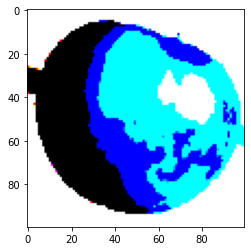

In [35]:
# The default size of the batch is 32 hence we get the output tensor shape as 32, image.shape
# The target size of the image path should be fed as image.shape[:2] since it the input without channel
# and identify it as 
for x,y in test_gen:
    print(f'{x[0].max()} -- {x[0].min()}')
    print(f'{y[0]}')
    print(f'{x.shape} -- {y.shape}')
    plt.imshow(x[0])
    plt.show()
    break

In [41]:
batch_size=100
test_gen = gen.flow_from_directory(test_path, target_size=IMAGE_SHAPE[:2], batch_size=batch_size, shuffle=True)
train_gen = gen.flow_from_directory(train_path, target_size=IMAGE_SHAPE[:2], batch_size=batch_size, shuffle=True)

Found 22688 images belonging to 131 classes.
Found 67692 images belonging to 131 classes.


In [42]:
epochs=5
val_steps = 22688 // batch_size
train_steps = 67692 // batch_size
history = model.fit_generator(train_gen, validation_data=test_gen,
                    epochs=epochs, steps_per_epoch=train_steps,
                    validation_steps=val_steps)

Epoch 1/5
676/676 [==============================] - 401s 594ms/step - loss: 0.3425 - mse: 3.6449e-04 - mae: 3.9939e-04 - mape: 199695.9844 - accuracy: 0.9740 - val_loss: 2.0579 - val_mse: 0.0011 - val_mae: 0.0011 - val_mape: 569318.6875 - val_accuracy: 0.9255
Epoch 2/5
676/676 [==============================] - 347s 513ms/step - loss: 0.2213 - mse: 2.2840e-04 - mae: 2.4678e-04 - mape: 123388.9922 - accuracy: 0.9840 - val_loss: 1.9191 - val_mse: 9.3339e-04 - val_mae: 9.7272e-04 - val_mape: 486359.5000 - val_accuracy: 0.9364
Epoch 3/5
676/676 [==============================] - 337s 499ms/step - loss: 0.2092 - mse: 1.9170e-04 - mae: 2.0598e-04 - mape: 102988.9688 - accuracy: 0.9866 - val_loss: 1.7238 - val_mse: 8.1495e-04 - val_mae: 8.5297e-04 - val_mape: 426486.1250 - val_accuracy: 0.9443
Epoch 4/5
676/676 [==============================] - 329s 486ms/step - loss: 0.1875 - mse: 1.6732e-04 - mae: 1.7889e-04 - mape: 89445.0859 - accuracy: 0.9883 - val_loss: 2.1824 - val_mse: 8.2627e-04 - 

In [50]:
%matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt
import time
def plt_dynamic(x, vy, ty, ax, label_val, label_train, colors=['b']):
  ax.plot(x, vy, 'b', label=label_val)
  ax.plot(x, ty, 'r', label=label_train)
  plt.legend()
  plt.grid()
  fig.canvas.draw()

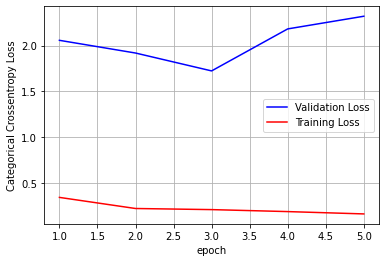

In [51]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Categorical Crossentropy Loss')
# list of epoch numbers
x = list(range(1,5+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax, 'Validation Loss', 'Training Loss')

In [46]:
history.history.keys()

dict_keys(['loss', 'mse', 'mae', 'mape', 'accuracy', 'val_loss', 'val_mse', 'val_mae', 'val_mape', 'val_accuracy'])

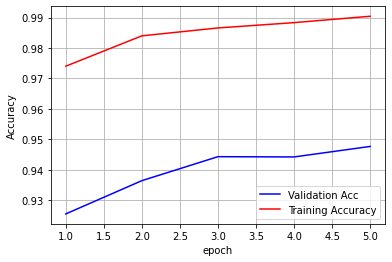

In [52]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('Accuracy')
# list of epoch numbers
x = list(range(1,5+1))
vy = history.history['val_accuracy']
ty = history.history['accuracy']
plt_dynamic(x, vy, ty, ax, 'Validation Acc', 'Training Accuracy')

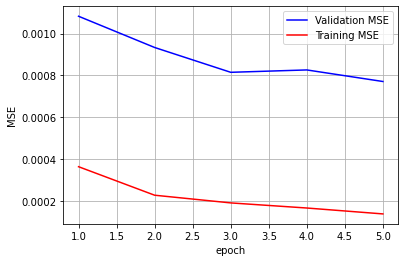

In [53]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch')
ax.set_ylabel('MSE')
# list of epoch numbers
x = list(range(1,5+1))
vy = history.history['val_mse']
ty = history.history['mse']
plt_dynamic(x, vy, ty, ax, 'Validation MSE', 'Training MSE')

In [ ]:
model.save('keras-fruits-classification_1')